In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Job Offer.csv')
df

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,>=9,Yes,Very Good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very Good,Good,Yes
8,>=8,yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CGPA                 10 non-null     object
 1   Interactive          10 non-null     object
 2   Practical Knowledge  10 non-null     object
 3   Skills               10 non-null     object
 4   Job Offer            10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [4]:
df.head()

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,>=9,Yes,Very Good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
label_encoder = LabelEncoder()

In [8]:
df['CGPA'] = label_encoder.fit_transform(df['CGPA'])
df['Interactive'] = label_encoder.fit_transform(df['Interactive'])
df['Practical Knowledge'] = label_encoder.fit_transform(df['Practical Knowledge'])
df['Skills'] = label_encoder.fit_transform(df['Skills'])
df['Job Offer'] = label_encoder.fit_transform(df['Job Offer'])


In [9]:
df.head()

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,0,0
4,1,1,1,1,1


In [11]:
x=df.iloc[:,:-1]
x

,CGPA,Interactive,Practical Knowledge,Skills
0,2,1,2,0
1,1,0,1,1
2,2,0,0,2
3,0,0,0,0
4,1,1,1,1
5,2,1,1,1
6,0,1,1,2
7,2,0,2,0
8,1,2,1,0
9,1,1,0,0


In [13]:
y=df.iloc[:,-1]
y

0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Job Offer, dtype: int32

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
X_train

,CGPA,Interactive,Practical Knowledge,Skills
5,2,1,1,1
0,2,1,2,0
7,2,0,2,0
2,2,0,0,2
9,1,1,0,0
4,1,1,1,1
3,0,0,0,0
6,0,1,1,2


In [17]:
X_test

,CGPA,Interactive,Practical Knowledge,Skills
8,1,2,1,0
1,1,0,1,1


In [18]:
y_train

5    1
0    1
7    1
2    0
9    1
4    1
3    0
6    0
Name: Job Offer, dtype: int32

In [19]:
y_test

8    1
1    1
Name: Job Offer, dtype: int32

In [20]:
decision_tree_model = DecisionTreeClassifier(
    criterion='entropy')

In [21]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred = decision_tree_model.predict(X_test)

In [23]:
y_pred

array([1, 1])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [25]:
print(accuracy)

1.0


In [26]:
print(classification_rep)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2]], dtype=int64)

<AxesSubplot:>

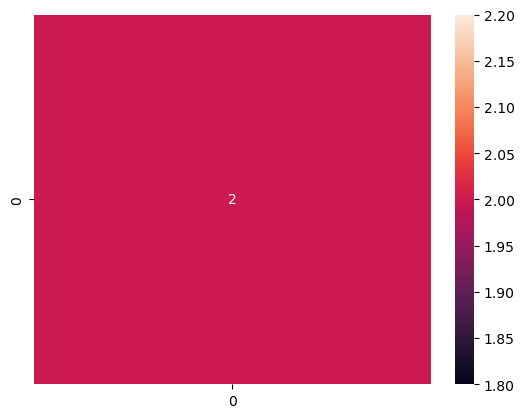

In [28]:
sns.heatmap(cm,annot=True)

In [29]:
from sklearn import tree

In [30]:
text_representation = tree.export_text(decision_tree_model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_3 <= 1.50
|   |   |--- class: 1
|   |--- feature_3 >  1.50
|   |   |--- class: 0



[Text(0.4, 0.8333333333333334, 'CGPA <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'Skills <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

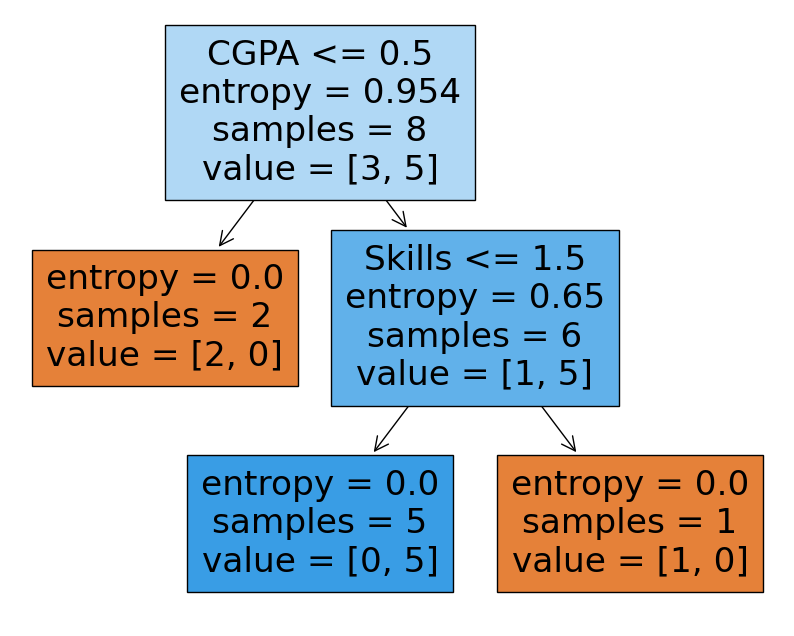

In [31]:
plt.figure(figsize=(10,8))
tree.plot_tree(decision_tree_model,filled=True,feature_names=df.columns)

In [32]:
with open("DT1.txt","w") as f:
 f=tree.export_graphviz(decision_tree_model,out_file=f)